# Anlisis de productos Sin Tacc

El siguiente notebook de jupyter fue creado con la intención de analizar los datos de la página de Anmat en relación a los tipos productos sin tacc y sus respectivas marcas.

* https://extranet.anmat.gov.ar/ALG_Mobile/asp/wfAlimentos.aspx

Voy a utilizar las herramientas Beatiful Soup con Python para la extracción de información de la web, y Pandas para organizar los datos y mostrarlos en pantalla.

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [ ]:
!pip install plotly

In [25]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go

## Parseo de datos

* Hago una copia de la web, y la descargo completa

In [2]:
soup = BeautifulSoup(open("./ALG On line.html"), "html.parser")

In [3]:
array = []

for tr in soup.find_all('tr'):
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    array.append(row)
    
df = pd.DataFrame(array, columns=["Tipo de producto", "Marca", "Nombre de Fantasía","Denominación de venta","RNPA"])

In [4]:
df = df.dropna()

## Analizo los datos

In [5]:
df.head(10)

,Tipo de producto,Marca,Nombre de Fantasía,Denominación de venta,RNPA
1,Aceites,Abedul,No registra,"Aceite de maíz, libre de gluten, sin TACC",02-508542
2,Aceites,Abedul,No registra,Aceite de maíz - Libre de gluten,02-519714
3,Aceites,Abedul.,No registra,Aceite de oliva virgen libre de gluten.,02-598508
4,Aceites,Abremundos,Aznar Pelleriti,Aceite de oliva virgen extra - Libre de gluten,13043077
5,Aceites,Alimentos Tomy,No registra,Aceite de oliva extra libre de gluten,03003988-2
6,Aceites,Almalegre,No registra,Aceite de oliva virgen extra orgánico - Libre ...,13043915
7,Aceites,Almalegre,No registra,Aceite de oliva virgen extra - Libre de gluten,13043916
8,Aceites,Alsamar,No registra,Aceite de girasol alto oleico libre de gluten,21-110318
9,Aceites,Alsamar,No registra,Aceite de girasol libre de gluten,21-004564
10,Aceites,Arcor,No registra,Aceite de maíz - Libre de gluten,02-524255


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14376 entries, 1 to 14376
Data columns (total 5 columns):
Tipo de producto         14376 non-null object
Marca                    14376 non-null object
Nombre de Fantasía       14376 non-null object
Denominación de venta    14376 non-null object
RNPA                     14376 non-null object
dtypes: object(5)
memory usage: 673.9+ KB


### Cantidad total de productos en el listado de ANMAT: 14376

In [7]:
df["Marca"].value_counts().head(10)

No registra      441
La Serenísima    149
Vacalin          117
Great Value      100
Mapsa             99
Carrefour         93
Canale            90
Día %             88
Arcor             87
Dulcor            84
Name: Marca, dtype: int64

* Agrupo por marca

In [8]:
df_products = df.groupby(["Marca"])["Tipo de producto"].count().reset_index(name='Cantidad de productos')

* Elimino registro "No registra"

In [9]:
df_products = df_products.drop(df_products[df_products["Marca"]=="No registra"].index,0)

* Muestro las marcas con mayores productos sin tacc (Mayor a 50)

In [10]:
df_products = df_products[df_products["Cantidad de productos"]>50].sort_values(by="Cantidad de productos", ascending=False)

### Cantidad de productos ordenados por marca que aparecen en el listado de ANMAT

In [11]:
df_products

,Marca,Cantidad de productos
1466,La Serenísima,149
2964,Vacalin,117
1205,Great Value,100
1728,Mapsa,99
435,Carrefour,93
408,Canale,90
819,Día %,88
145,Arcor,87
789,Dulcor,84
2636,Santa María,81


* Marcas, cantidad de productos > 70

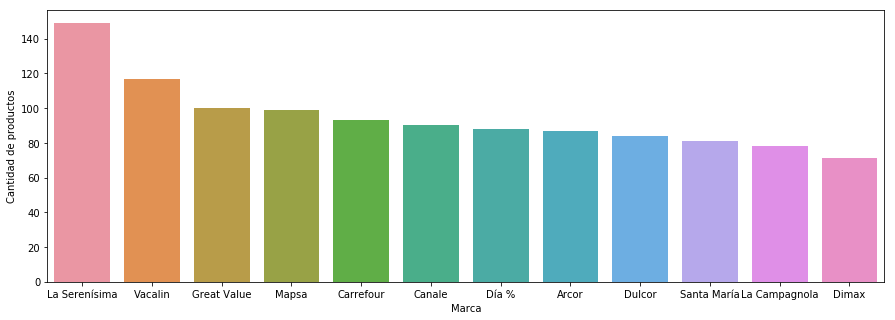

In [12]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Marca", y="Cantidad de productos", data=df_products[df_products["Cantidad de productos"]>70])

* Ordenados por tipos de producto

In [13]:
df_type_products = df.groupby(["Tipo de producto"])["Marca"].count().reset_index(name='Cantidad')

In [14]:
df_type_products = df_type_products.sort_values(by="Cantidad", ascending=False)

In [15]:
df_type_products

,Tipo de producto,Cantidad
49,Quesos,1477
42,"Mermeladas, confituras y dulces",809
20,"Cereales, harinas, premezclas y semillas",805
33,Galletas y galletitas,756
36,Leches,582
26,"Conservas de hortalizas, verduras y legumbres",580
45,"Postres, flanes y helados listos para consumir",561
30,Fiambres y embutidos,527
57,Yogures,518
12,Bebidas sin alcohol y productos para prepararlas,486


### Cantidad de productos ordenados por tipos

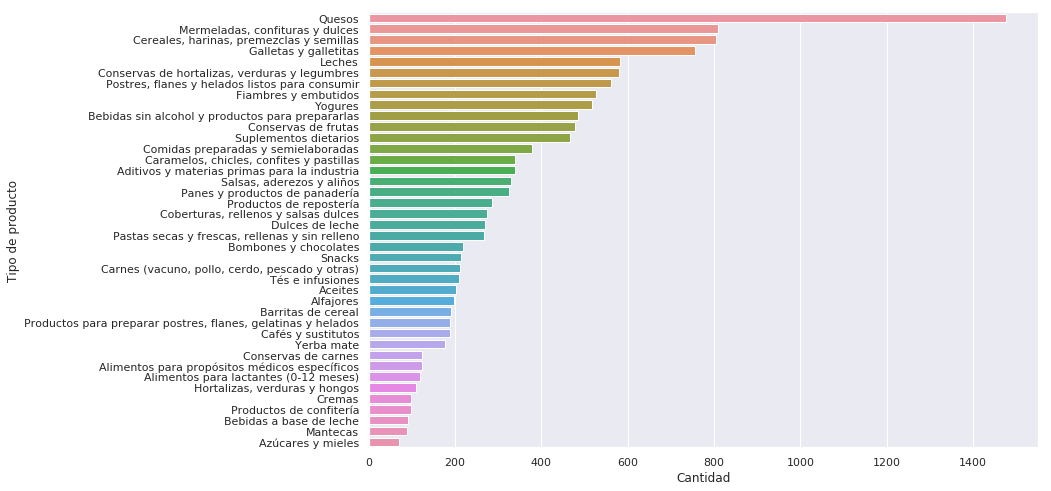

In [16]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.barplot(x="Cantidad", y="Tipo de producto", data=df_type_products[df_type_products["Cantidad"]>70])